**Q.** Why is the model performing poorly to predict *"Normal"* obesity level?

**A.** Potentially the dataset's variables are not enough to describe people with such obesity level precisely. For example, other genetic factors, metabolism rate, sleep patterns, body fat percentage and so on...

Let us analyze the dataset to gain more insights.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/obesity_train.csv')

In [8]:
df = df.set_index('id')

In [9]:
df = df[df['obese_level'] == 'Normal_Weight']

In [17]:
df = df.drop(columns='marrital_status')

In [18]:
df.describe()

,age,height,meals_perday,siblings,weight
count,216.000000,220.000000,221.000000,219.000000,206.000000
mean,21.754630,1.683273,2.705882,1.452055,63.402913
std,5.273892,0.096364,0.904238,1.169660,13.222220
min,16.000000,1.500000,1.000000,0.000000,42.000000
25%,19.000000,1.600000,3.000000,0.000000,56.000000
50%,21.000000,1.675000,3.000000,1.000000,62.000000
75%,23.000000,1.750000,3.000000,3.000000,70.000000
max,61.000000,1.930000,4.000000,3.000000,193.000000


There is a high variance in age and weight

<Axes: >

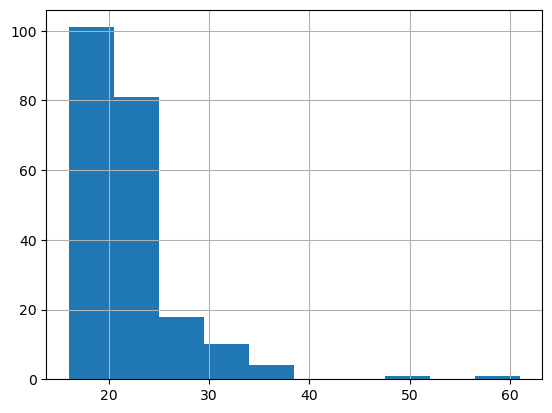

In [52]:
df['age'].hist()

<Axes: >

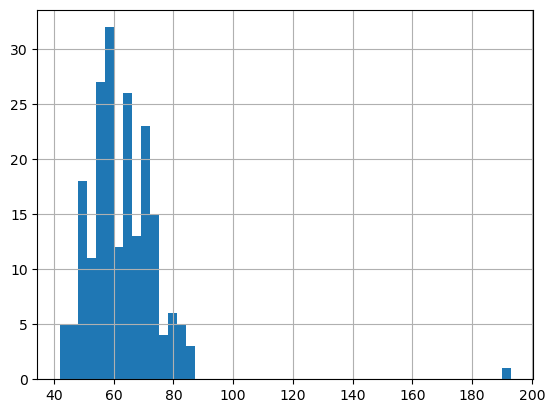

In [57]:
df['weight'].hist(bins=50)

<Axes: >

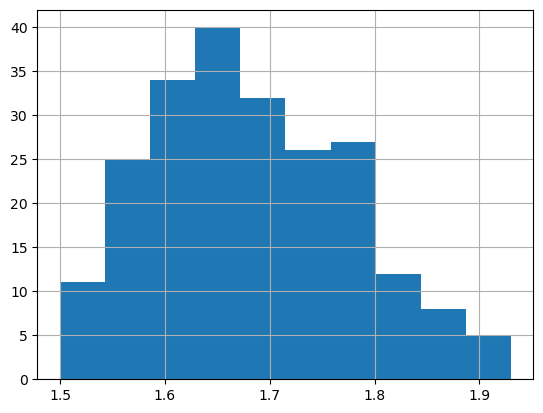

In [58]:
df['height'].hist()

In [21]:
df.select_dtypes(exclude='O').corr().style.bar()

,age,height,meals_perday,siblings,weight
age,1.000000,0.010894,-0.044198,-0.018789,0.107612
height,0.010894,1.000000,0.125866,0.051275,0.621663
meals_perday,-0.044198,0.125866,1.000000,-0.026811,0.044665
siblings,-0.018789,0.051275,-0.026811,1.000000,0.075884
weight,0.107612,0.621663,0.044665,0.075884,1.000000


In [48]:
cat = df.select_dtypes(include='O').columns.tolist()

0 alcohol_freq
1 caloric_freq
2 devices_perday
3 eat_between_meals
4 gender
5 monitor_calories
6 parent_overweight
7 physical_activity_perweek
8 region
9 smoke
10 transportation
11 veggies_freq


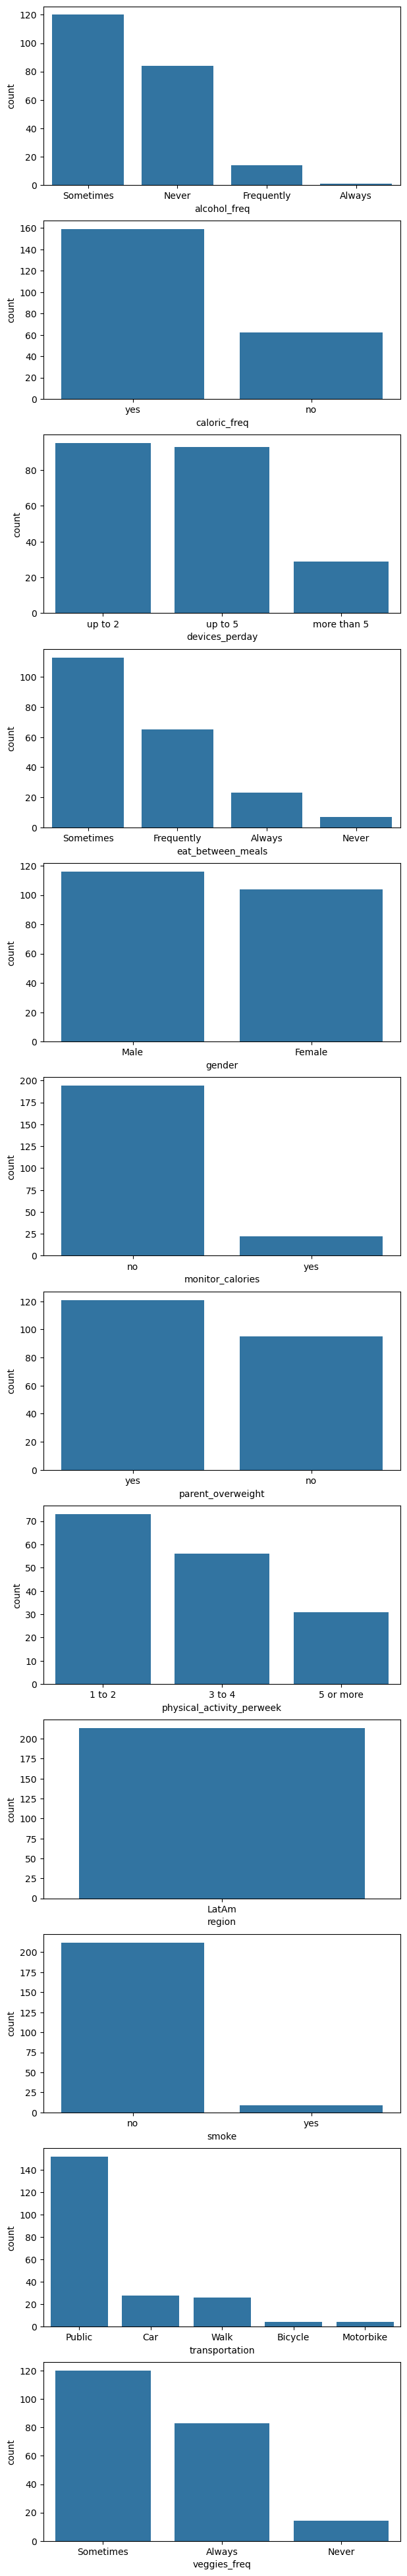

In [51]:
fig, axes = plt.subplots(len(cat)-1, 1, figsize=(7, 50))
cat = cat[:-1]
for i,c in enumerate(cat):
    print(i,c)
    sns.barplot(df[c].value_counts(), ax=axes[i])